In [17]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from keras import layers, models, optimizers, losses, metrics,Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import pandas as pd

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784')


What kind of preprocessing does the data require?

In [18]:
import tensorflow as tf
print(tf.__version__)


2.10.1


In [19]:
X,y=mnist['data'],mnist['target']

In [20]:
# Converting the dataframe to a numpy array

X=X.to_numpy() 
 
# Normalize the pixels beetween 0 and 1 

X_normalized= X  /  255.0

# Reshaped data

X_normalized_reshaped = X_normalized.reshape(-1,28,28)

print(f'Normalized dataset shape: {X_normalized_reshaped.shape}')


Normalized dataset shape: (70000, 28, 28)


In [21]:
y_one_hot=to_categorical(y)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_one_hot, test_size=0.2, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (56000, 784)
Test data shape: (14000, 784)
Training labels shape: (56000, 10)
Test labels shape: (14000, 10)


In [22]:
#define the model
model=Sequential()

#input laver will be 784 beacuse we have that many pixels 
#and we use activation relu because of its simplicity

#ReLU is activation function in neural network that helps models learn better and faster
#It works by turning off neurons for negative values(outputting 0) 
#and passing positive vlaues as they are

model.add(Dense(512,input_shape=(784,),activation='relu'))

#Adding input layer

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

#adding outut layer we use softmax now to convert 
# the output scores into probabilites

model.add(Dense(10,activation='softmax'))

#Compile the model
#Adam is used beacuse it adapats the learning rate for each paramter
#imporving training efficinecy and performance

#Categorical Cross-Entropy is used for multy-class classification
#it measues how well the predicted probabiltues match the class labels,
#penalizing incorrect predictions effectievly

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()






Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [27]:
 # Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=2)


Epoch 1/10
700/700 - 2s - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.1136 - val_accuracy: 0.9791 - 2s/epoch - 2ms/step
Epoch 2/10
700/700 - 1s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.1224 - val_accuracy: 0.9799 - 1s/epoch - 2ms/step
Epoch 3/10
700/700 - 1s - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.1209 - val_accuracy: 0.9785 - 1s/epoch - 2ms/step
Epoch 4/10
700/700 - 1s - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.1328 - val_accuracy: 0.9779 - 1s/epoch - 2ms/step
Epoch 5/10
700/700 - 1s - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.1138 - val_accuracy: 0.9807 - 1s/epoch - 2ms/step
Epoch 6/10
700/700 - 1s - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.1281 - val_accuracy: 0.9774 - 1s/epoch - 2ms/step
Epoch 7/10
700/700 - 1s - loss: 0.0073 - accuracy: 0.9981 - val_loss: 0.1189 - val_accuracy: 0.9804 - 1s/epoch - 2ms/step
Epoch 8/10
700/700 - 1s - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.1478 - val_accuracy: 0.9796 - 1s/epoch - 2ms/step
Epoch 9/10
700/700 - 1s 

In [28]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'Test accuracy: {test_acc}')


438/438 - 1s - loss: 0.1519 - accuracy: 0.9783 - 657ms/epoch - 1ms/step
Test accuracy: 0.9782857298851013


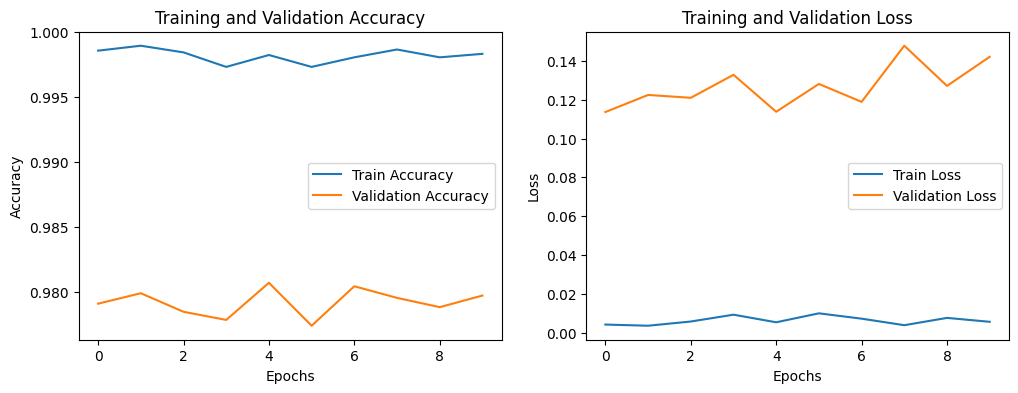

In [29]:
import matplotlib.pyplot as plt


# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
